실전 기계 학습 Lab 04

소프트웨어융합학과 2018102111 서보민

1. [프로그램 4-4]의 13행은 은닉층의 노드 개수로 100을 사용한다. 은닉층의 노드 개수를 200으
로 늘려 성능을 측정하고 둘의 성능을 비교하시오.


[[ 969    0    5    0    2    2    4    1    4    2]
 [   0 1125    1    0    0    1    3    2    1    3]
 [   0    3 1007    6    4    0    3   11    3    0]
 [   1    0    3  987    1    9    1    4    5    3]
 [   1    0    2    0  956    1    3    1    4    8]
 [   0    1    0    4    1  868    3    0    2    6]
 [   3    2    1    0    5    5  939    0    2    0]
 [   1    1    3    5    2    1    0 1002    4    2]
 [   4    3    9    5    2    4    2    3  944    2]
 [   1    0    1    3    9    1    0    4    5  983]]
은닉층 노드 개수가 100인 테스트 집합에 대한 정확률은  97.8 %입니다.

[[ 972    0    2    0    2    1    4    1    4    2]
 [   0 1123    1    0    1    0    2    3    1    2]
 [   1    3 1009    4    0    0    4    7    1    0]
 [   0    2    1  992    1   11    1    1    6    3]
 [   1    0    1    0  964    0    2    1    3    9]
 [   0    0    0    4    0  868    5    0    1    2]
 [   1    2    1    1    4    4  937    0    3    0]
 [   1    1    7    2    2    2    0 1003    2    3]


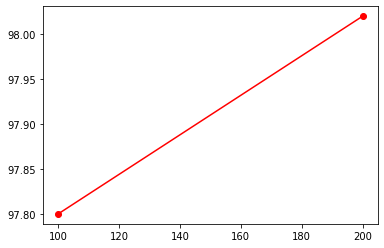

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

mnist = fetch_openml('mnist_784')
mnist.data = mnist.data/255.0
x_train = mnist.data[:60000]; x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000]); y_test = np.int16(mnist.target[60000:])

mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size = 512, max_iter = 300, solver='adam', verbose = False)
mlp.fit(x_train,y_train)

res = mlp.predict(x_test)

conf = np.zeros((10,10), dtype = np.int16)
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print("은닉층 노드 개수가 100인 테스트 집합에 대한 정확률은 ",accuracy *100,"%입니다.")
print()

mlp = MLPClassifier(hidden_layer_sizes=(200), learning_rate_init=0.001, batch_size = 512, max_iter = 300, solver='adam', verbose = False)
mlp.fit(x_train,y_train)

res = mlp.predict(x_test)

conf = np.zeros((10,10), dtype = np.int16)
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy2 = no_correct/len(res)
print("은닉층 노드 개수가 200인 테스트 집합에 대한 정확률은 ",accuracy2 *100,"%입니다.")

a = [100,200]
b = [accuracy*100, accuracy2 * 100]
plt.plot(a,b, marker = 'o', color = 'red')
plt.show()

2. [프로그램 4-5]를 MNIST에 적용하시오.

In [2]:
from sklearn.model_selection import train_test_split, validation_curve
import time

x_train = mnist.data[:2000]; x_test = mnist.data[69500:]
y_train = np.int16(mnist.target[:2000]); y_test = np.int16(mnist.target[69500:])

start = time.time()
mlp = MLPClassifier(learning_rate_init=0.001, batch_size = 32, max_iter = 300, solver = "sgd")
prange = range(50,1001,50)
train_score, test_score = validation_curve(mlp, x_train, y_train, param_name = "hidden_layer_sizes", param_range = prange, cv = 3, scoring="accuracy", n_jobs = 4)
end = time.time()
print("하이퍼 매개변수 최적화에 걸린 시간은", end - start,"초입니다.")

하이퍼 매개변수 최적화에 걸린 시간은 6506.341623544693 초입니다.


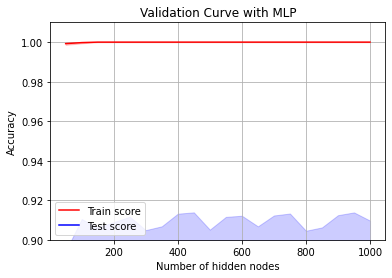


최적의 은닉층의 노드 개수는  900 개 입니다.

[[49.  0.  5.  2.  0.  1.  3.  0.  0.  0.]
 [ 0. 60.  0.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0. 33.  4.  1.  0.  1.  0.  0.  0.]
 [ 1.  0.  2. 42.  0.  2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0. 46.  1.  0.  0.  0.  4.]
 [ 0.  0.  1.  0.  0. 33.  2.  0.  1.  1.]
 [ 0.  0.  1.  0.  0.  3. 42.  0.  1.  0.]
 [ 0.  0.  1.  1.  1.  0.  0. 59.  1.  4.]
 [ 0.  0.  5.  3.  1.  0.  0.  0. 44.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0. 34.]]
테스트 집합에 대한 정확률은  88.4 %입니다.


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [3]:
train_mean = np.mean(train_score, axis = 1)
train_std = np.std(train_score, axis = 1)
test_mean = np.mean(test_score, axis = 1)
test_std = np.std(test_score, axis = 1)

plt.plot(prange, train_mean, label = "Train score", color = "r")
plt.plot(prange, test_mean, label = "Test score", color = "b")
plt.fill_between(prange, train_mean - train_std, train_mean + train_std, alpha = 0.2, color = 'r')
plt.fill_between(prange, test_mean - test_std, test_mean + test_std, alpha = 0.2, color = 'b')
plt.legend(loc = "best")
plt.title("Validation Curve with MLP")
plt.xlabel("Number of hidden nodes")
plt.ylabel("Accuracy")
plt.ylim(0.9,1.01)
plt.grid(axis = 'both')
plt.show()

best_number_nodes = prange[np.argmax(test_mean)]
print("\n최적의 은닉층의 노드 개수는 ", best_number_nodes,"개 입니다.\n")

mlp_test = MLPClassifier(hidden_layer_sizes=(best_number_nodes), learning_rate_init=0.001, batch_size = 32, max_iter = 300, solver = 'sgd')
mlp_test.fit(x_train, y_train)

res = mlp_test.predict(x_test)

conf = np.zeros((10, 10))
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1
print(conf)

no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print("테스트 집합에 대한 정확률은 ", accuracy * 100, "%입니다.")

3. [프로그램 4-4]는 은닉층이 하나인 다층 퍼셉트론을 사용한다. 은닉층을 2, 3, 4, 5개로 점점 늘려
깊게 만들면서 성능 변화를 측정하고 이렇게 깊어지면 성능 향상이 있는지 확인하시오. 실험은
MNIST 데이터를 사용하시오.


In [4]:
x_train = mnist.data[:60000]; x_test = mnist.data[60000:]
y_train = np.int16(mnist.target[:60000]); y_test = np.int16(mnist.target[60000:])

mlp = MLPClassifier(hidden_layer_sizes=(100), learning_rate_init=0.001, batch_size = 512, max_iter = 300, solver='adam', verbose = False)
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.001, batch_size = 512, max_iter = 300, solver='adam', verbose = False)
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 100, 100), learning_rate_init=0.001, batch_size = 512, max_iter = 300, solver='adam', verbose = False)
mlp4 = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), learning_rate_init=0.001, batch_size = 512, max_iter = 300, solver='adam', verbose = False)
mlp5 = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.001, batch_size = 512, max_iter = 300, solver='adam', verbose = False)
mlp.fit(x_train,y_train)
mlp2.fit(x_train,y_train)
mlp3.fit(x_train,y_train)
mlp4.fit(x_train,y_train)
mlp5.fit(x_train,y_train)

res = mlp.predict(x_test)
res2 = mlp2.predict(x_test)
res3 = mlp3.predict(x_test)
res4 = mlp4.predict(x_test)
res5 = mlp5.predict(x_test)

conf = np.zeros((10,10), dtype = np.int16)
for i in range(len(res)):
  conf[res[i]][y_test[i]] += 1

conf2 = np.zeros((10,10), dtype = np.int16)
for i in range(len(res2)):
  conf2[res2[i]][y_test[i]] += 1

conf3 = np.zeros((10,10), dtype = np.int16)
for i in range(len(res3)):
  conf3[res3[i]][y_test[i]] += 1

conf4 = np.zeros((10,10), dtype = np.int16)
for i in range(len(res4)):
  conf4[res4[i]][y_test[i]] += 1

conf5 = np.zeros((10,10), dtype = np.int16)
for i in range(len(res5)):
  conf5[res5[i]][y_test[i]] += 1


no_correct = 0
for i in range(10):
  no_correct += conf[i][i]
accuracy = no_correct/len(res)
print("은닉층이 1층인 테스트 집합에 대한 정확률은 ",accuracy *100,"%입니다.")

no_correct = 0
for i in range(10):
  no_correct += conf2[i][i]
accuracy2 = no_correct/len(res2)
print("은닉층이 2층인 테스트 집합에 대한 정확률은 ",accuracy2 *100,"%입니다.")

no_correct = 0
for i in range(10):
  no_correct += conf3[i][i]
accuracy3 = no_correct/len(res3)
print("은닉층이 3층인 테스트 집합에 대한 정확률은 ",accuracy3 *100,"%입니다.")

no_correct = 0
for i in range(10):
  no_correct += conf4[i][i]
accuracy4 = no_correct/len(res4)
print("은닉층이 4층인 테스트 집합에 대한 정확률은 ",accuracy4 *100,"%입니다.")

no_correct = 0
for i in range(10):
  no_correct += conf5[i][i]
accuracy5 = no_correct/len(res5)
print("은닉층이 5개인 테스트 집합에 대한 정확률은 ",accuracy5 *100,"%입니다.")



은닉층이 1층인 테스트 집합에 대한 정확률은  97.3 %입니다.
은닉층이 2층인 테스트 집합에 대한 정확률은  97.88 %입니다.
은닉층이 3층인 테스트 집합에 대한 정확률은  97.87 %입니다.
은닉층이 4층인 테스트 집합에 대한 정확률은  97.91 %입니다.
은닉층이 5개인 테스트 집합에 대한 정확률은  97.78 %입니다.


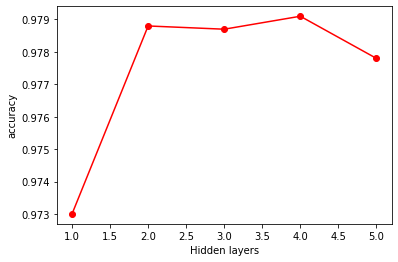

In [5]:
x = [1,2,3,4,5]
y = [accuracy, accuracy2, accuracy3, accuracy4, accuracy5]

plt.xlabel('Hidden layers')
plt.ylabel('accuracy')
plt.plot(x,y, marker = 'o', color = 'red')
plt.show()

4. 다음 그림은 3차원 특징 공간에 두 부류의 샘플이 8개 분포하는 상황이다.

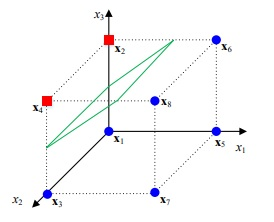

(1) 이 데이터 분포를 나타내는 훈련 집합을 쓰시오.

In [6]:
X = [[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]
y = [-1,1,-1,1,-1,-1,-1,-1]

(2) 이 데이터를 인식하는 퍼셉트론을 그림으로 제시하시오.


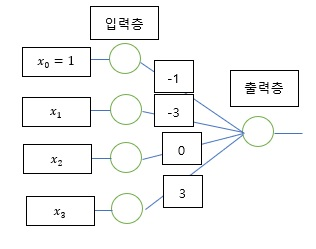

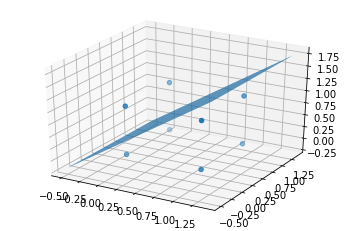

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x1 = []
x2 = []
x3 = []
for i in range(len(X)):
  x1.append(X[i][0])
  x2.append(X[i][1])
  x3.append(X[i][2])

ax.scatter(x1,x2,x3, marker="o")
X = np.arange(-0.5, 1.5, 0.1)
Y = np.arange(-0.5, 1.5, 0.1)
X, Y = np.meshgrid(X, Y)
Z = X + float(1/3)
ax.plot_surface(X, Y, Z)

plt.show()

(3) 이 데이터를 인식하도록 [프로그램 4-1]을 수정하고, 실행 결과를 제시하시오.

In [9]:
from sklearn.linear_model import Perceptron
X = [[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]]
y = [-1,1,-1,1,-1,-1,-1,-1]
p = Perceptron()
p.fit(X,y)

print("학습된 퍼셉트론의 매개변수(가중치) :", p.coef_,p.intercept_)
print("훈련집합에 대한 예측: ", p.predict(X))
print("정확률 측정:", p.score(X,y)*100,"%")

학습된 퍼셉트론의 매개변수(가중치) : [[-3.  0.  3.]] [-1.]
훈련집합에 대한 예측:  [-1  1 -1  1 -1 -1 -1 -1]
정확률 측정: 100.0 %
